<img src="./intro/logo_UTN.svg" title="Logo UTN" align="right" width="150"> 

# TRABAJO PRÁCTICO DE LABORATORIO N°1
# TEORÍA MODERNA Y FILTRADO ACTIVO

## Teoría de Circuitos II
### Curso: R4001
### Alumno: Federico Albero
### Profesor: Mariano Llamedo Soria
### Jefe de TPs: César Fuoco
### Ayudante de TPs: Israel Pavelek

---

## Consignas del trabajo:
<img src="./intro/consignas.png" title="Figura 1">
<p style="text-align: center;">Figura 1: Consignas extraídas del documento del trabajo práctico a realizar</p>

## Plantilla de diseño:
<img src="./intro/plantilla.png" title="Figura 2">
<p style="text-align: center;">Figura 2: Plantilla de diseño del filtro notch a implementar</p>

---

## Sección N°1: Desarrollo del filtro
Se adjunta [Hoja de datos UAF42](https://www.ti.com/lit/ds/symlink/uaf42.pdf?ts=1688656770095&ref_url=https%253A%252F%252Fwww.google.com%252F) para su visualiación.

### 1.1) Circuito Integrado UAF42:

En el presente trabajo se hará uso del circuito integrado **UAF42**, el cual es un filtro activo universal que cuenta con múltiples salidas correspondientes a distintas funciones de filtrado: filtro pasa bajos (LPF), filtro pasa altos (HPF) y filtro pasa banda (BPF). Además, cuenta con un amplificador operacional (OPAMP) extra, cuyos terminales están disponibles a través de los pines del C.I. y se puede utilizar para poder obtener otras funciones de filtrado a las ya mencionadas anteriormente.

Otro aspecto relevante a destacar de este circuito integrado es que ya cuenta con ciertos componentes electrónicos integrados en el propio chip del circuito, los cuales cuentan con una tolerancia muy baja del 0.5% y permiten lograr resultados semejantes a los obtenidos en las simulaciones numéricas y circuitales.

<img src="./UAF42/UAF42_SCH.png" title="Figura 3">
<p style="text-align: center;">Figura 3: Circuito esquemático del UAF42</p>

<img src="./UAF42/UAF42_SCH2.png" title="Figura 4">
<p style="text-align: center;">Figura 4: Circiuto esquemático detallado del UAF42</p>

$ Donde: $

$ R_1 = R_2 = R_4 = R_G = 50K\Omega \pm 0.5 \% $

$ C_1 = C_2 = 1nF \pm 0.5 \% $

**ACLARACIÓN:** Tal como figura en la nota que aparece en este recorte de la hoja de datos, se eligió el valor de $R_G = 50K\Omega$ durante el desarrollo analítico del filtro. De esta manera, se evita tener que agregar otro resistor externo al circuito y se aprovecha el que ya viene incluido en el C.I. con una baja tolerancia de $\pm 0.5 \%$. Como consecuencia de esta elección, se debe conectar la señal de entrada $V_{IN}$ al pin n°2 del integrado en lugar del n°3. Esto se podrá visualizar con mayor claridad en las figuras 8 y 14 posteriormente.

### 1.2) Ecuaciones de diseño:

<img src="./UAF42/ecuaciones_diseño.png" title="Figura 5">
<p style="text-align: center;">Figura 5: Ecuaciones de diseño para el filtro activo, extraidas de la pág. 6 de la hoja de datos del UAF42</p>

### 1.3) Desarrollo analítico del filtro:

In [1]:
from IPython.display import IFrame
IFrame("./archivos/Desarrollo-Analitico-TP-Lab-1.pdf", width=1000, height=1000)

> **Fe de Erratas:** Cabe aclarar que, según lo obtenido en la página número 5 del desarrollo analítico del filtro, el valor de $R_Q=6733 \Omega$, cuyo valor comercial mas cercano sería $6800 \Omega$, sin embargo, se utilizó el valor de $R_Q=6200 \Omega$ para la implementación circuital. Esto se debe a un error por parte nuestra, ya que en una primera instancia se iba a utilizar el valor de $R_{F1} = R_{F2} = R_{F} = 3.183M \Omega$, para el cual correspondía una $R_Q=6250 \Omega$ y en consecuancia, su valor comercial mas cercano de $6200 \Omega$. Esto cambió cuando se decidió modificar la topología de los circuitos integradores presentes en el filtro con la incorporación de la estructura en "T" de resistencias, con el objetivo de evitar tener que utilizar resistencias de tan alto valor $(3.183M \Omega)$, ya que esto podría llegar a ocasionar inconvenientes al momento de efectuar mediciones sobre el circuito.

### 1.4) Diagrama en bloques del filtro:

<img src="./UAF42/diagrama-en-bloques.png" title="Figura 6">
<p style="text-align: center;">Figura 6: Diagrama en bloques de la composición de la función transferencia de un filtro notch</p>

---

## Sección N°2: Simulación numérica y circuital

Luego de haber diseñado el filtro y hacer el desarrollo analítico correspondiente, se procede a simularlo tanto numérica como circuitalmente para evaluar su desempeño y posteriormente, implementarlo circuitalmente en una placa.

### 2.1) Simulación numérica del filtro:

#### Función transferencia del filtro Notch (normalizada)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

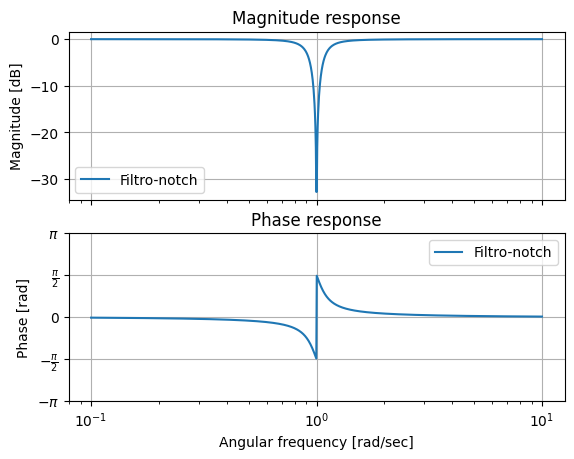

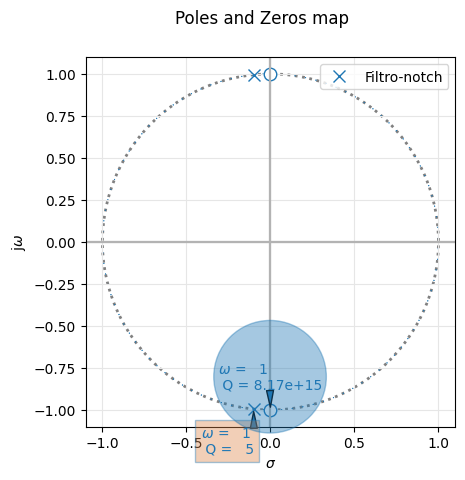

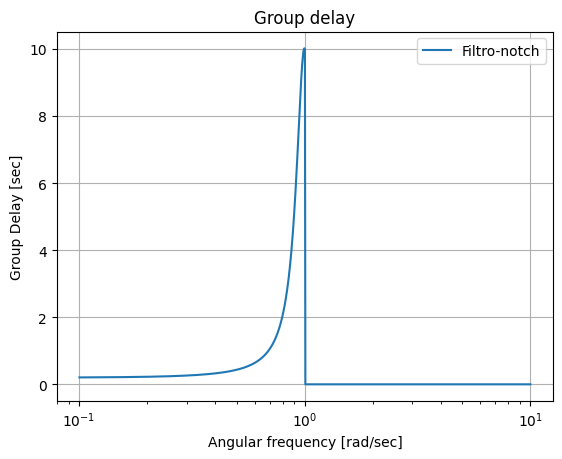

In [2]:
#%% TRABAJO PRÁCTICO DE LABORATORIO N°1 %%#
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Jul  8 15:12:13 2023

@author: fede23
"""
# Modulos:
import scipy.signal as sig
import matplotlib.pyplot as plt
import math as m

from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_lti, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

# esto dejarlo así, no tocar, es para graficar
all_sys = []
filter_names = []

#%% Valores plantilla de diseño %%#

fo  = 50    # [Hz]
n   = 2     # [orden]
BW  = 10    # [Hz]

wo  = 2*m.pi*fo
Q   = fo/BW

#%% Función transferencia filtro notch %%#

num = [1, 0, 1]
den = [1, (1/Q), 1]

tf = sig.TransferFunction(num, den)
all_sys.append(tf)
sos = tf2sos_analog(num, den)
label1 = 'Filtro-notch'
print_subtitle('Función transferencia del filtro Notch (normalizada)')
pretty_print_SOS(sos, mode='omegayq')
pretty_print_lti(num, den)
filter_names.append(label1)

#%% Grafico %%#

plt.close('all') # cierro todo antes de graficar nuevamente por las dudas
analyze_sys( all_sys, filter_names)


##### Resultados simulación numérica:

* Se utilizó como norma de frecuencia $\Omega_w=2 \pi \cdot f_o = 2 \pi \cdot 50Hz$, la frecuencia a eliminar con el filtro notch.
* Al observar el diagrama de polos y ceros, se puede encontrar un par de ceros complejos conjugados sobre el eje $Jw$, a la altura de la circunferencia de radio unitario $w=1$. También se puede visualizar un par de polos complejos conjugados, nuevamente sobre la circunferencia unitaria y muy próximos al par de ceros mencionados anteriormente. Esta distribución de singularidades es característica de esta función de filtrado.
* Analizando el gráfico de $|T_{N(s)}|$, se puede apreciar una máxima planicidad de $0\,dB$ para frecuencias tanto inferiores como superiores a la frecuencia $w_o$ a eliminar. Por en contrario, en $w=w_o=1$ (gráfico normalizado), se puede observar una gran atenuación que llega hasta los $-32\,dB$ aproximadamente (ver figura $6\frac{1}{2}$).
* Visualizando el gráfico de la respuesta de fase del filtro, se puede apreciar un salto $\pi$ radianes (180°) en la fase, desde $\frac{-\pi}{2}$ hasta $\frac{+\pi}{2}$, como consecuencia del par de ceros complejos conjugados sobre el eje $Jw$.

<img src="./sim-python/medicion-modulo-py.png" title="Figura 6 1/2">
<p style="text-align: center;">Figura $6 \frac{1}{2}$</p>

### 2.2) Simulación circuital del filtro:

##### Red circuital:
<img src="./sim-ltspice/circuito.png" title="Figura 7">
<p style="text-align: center;">Figura 7: Circuito esquemático del filtro notch</p>

<img src="./sim-ltspice/circuito2.png" title="Figura 8">
<p style="text-align: center;">Figura 8: Circuito esquemático del filtro notch, encapsulando los componentes del UAF42</p>


##### Gráficos:

<img src="./sim-ltspice/mod-fase-spice.png" title="Figura 9">
<p style="text-align: center;">Figura 9: Gráfico de respuesta en módulo y fase de la transferencia en LTspice</p>

<img src="./sim-ltspice/retardo-grupo_spice.png" title="Figura 10">
<p style="text-align: center;">Figura 10: Gráfica de retardo de grupo de la transferencia en LTspice</p>

##### Simulación de Montecarlo:

<img src="./sim-ltspice/Red_Montecarlo.png" title="Figura 11">
<p style="text-align: center;">Figura 11: Circuito esquemático preparado para un análisis de Montecarlo</p>

<img src="./sim-ltspice/Sim_Montecarlo.png" title="Figura 12">
<p style="text-align: center;">Figura 12: Gráfico de respuesta de módulo y fase de un análisis de Montecarlo</p>

<img src="./sim-ltspice/retardo-grupo_montecarlo.png" title="Figura 13">
<p style="text-align: center;">Figura 13: Gráfico de retardo de grupo de un análisis de Montecarlo</p>

##### Resultados simulación circuital:

* Principalmente, a través de la simulación circuital se puede verificar lo obtenido previamente con la simulación numérica, pero en este caso los gráficos arrojados corresponden a frecuencia desnormalizada.
* En la figura 9 se efectuaron mediciones para verificar el ancho de banda (BW: frecuencia para la cual la transferencia cae 3dB) del filtro, el cual aproximadamente es de 10Hz como lo indica la plantilla de diseño.
* En el gráfico de la respuesta de fase del filtro, se puede ver como esta en $f_o=50Hz$ "salta" desde -90° hacia +90°, tal como se observó previamente en la simulación numérica.
* También se efectuó un análisis de Montecarlo para poder visualizar como afectan las tolerancias de tanto las resistencias internas del circuito integrado ($\pm 0.5 \%$) como de las externas ($\pm 1 \%$) a la frecuencia $f_o$ del filtro, según las ecuaciones de diseño de la figura 5.

---

## Sección N°3: Armado del prototipo del filtro

Luego de verificar que los resultados de las simulaciones, tanto numérica como circuital sean los correctos, se procede a materializar el filtro en cuestión.

Entre las distintas opciones disponibles, se optó por implementar el circuito en una placa universal perforada de 10 x 5 Cm, ya que al tratarse de un prototipo experimental en primera instancia, esta nos brindaba la posibilidad de realizar modificaciones o corregir algún defecto a futuro.

Ya que el circuito cuenta con una cantidad considerable de componentes, se decidió recurrir a un programa de diseño de circuitos impresos y se utilizó una grilla de 2.54mm para emular al PCB como si fuese una placa universal perforada. De esta manera, se facilitó el proceso de posicionar a los componentes en la placa y efectuar sus conexiones.

Para interconectar los componentes, se recurrió a cables unifilares de cobre (tipo UTP) cuando se trataba de pistas de mayor extensión, mientras que las conexiones mas cortas se resolvieron con soldaduras de estaño.

El circuito se alimenta a través de una bornera triple, en cuyos terminales se conectan las tensiones de +Vcc, 0V y -Vcc que proveeran las fuentes de laboratorio. En estos puntos de alimentación se agregaron también capacitores de _bypass_ (cerámicos de $100nF$ y electrolíticos de $220uF$) para reducir el ruido de la fuente.

También, se agregaron varios _test points_ (puntos de medición) en los nodos mas importantes del circuito mediante pineras macho, con el objetivo facilitar las mediciones sobre la placa al momento de evaluar el prototipo en el laboratorio. De esta manera, se garantiza un buen contacto eléctrico entre las pineras y las puntas de osciloscopio o puntas cocodrilo al momento de efectuar las mediciones.

### 3.1) Circuito esquemático:

<img src="./PCB/sch.png" title="Figura 14">
<p style="text-align: center;">Figura 14: Circuito esquemático realizado en Kikad</p>

<img src="./UAF42/UAF42_pinout.png" title="Figura 15" width="450">
<p style="text-align: center;">Figura 15: Pinout UAF42</p>

### 3.2) Diseño del PCB:

<img src="./PCB/pcb_con_pistas.png" title="Figura 16">
<p style="text-align: center;">Figura 16: Circuito impreso diseñado</p>

### 3.3) Puntos de medición del circuito:

<img src="./PCB/pcb_sin_pistas2.png" title="Figura 17">
<p style="text-align: center;">Figura 17: Otra vista del PCB, en donde se detallan los puntos de medición y los puertos de alimentación del circuito</p>

### 3.4) Placa materializada:

<img src="./PCB/PCB-foto.jpg" title="Figura 18">
<p style="text-align: center;">Figura 18: Circuito materializado en una placa universal</p>

### 3.5) Bill of Materials (BOM):

<img src="./excel/new_bom.png" title="Figura 19">
<p style="text-align: center;">Figura 19: Lista de materiales</p>

---

## Sección N°4: Mediciones

### 4.1) Revisión previa del prototipo:

Antes de realizar la práctica de laboratorio el día jueves 22/06, se asistió al laboratorio abierto de la facultad una semana antes para probar el funcionamiento de la placa prototipo y dejarla en condiciones óptimas para el trabajo práctico. Afortunadamente la placa funcionó de manera correcta desde el primer momento y no hubo que efectuar arreglos sobre la misma. Solamente fue necesario ajustar el preset multivuelta $RV3$ para poder llegar a una frecuencia $f_o=50Hz$.

<img src="./mediciones-labo/medicion-previa.jpg" title="Figura 20" width="350">
<p style="text-align: center;">Figura 20: Ensayo de prototipo en el laboratorio abierto. Jueves 22/06/23</p>

### 4.2) Diagrama de conexiones para la toma de mediciones:

<img src="./UAF42/diagrama-conexion.png" title="Figura 21" width="700">
<p style="text-align: center;">Figura 21: Diagrama de conexión de los instrumentos de laboratorio</p>

**ACLARACIÓN:** Se asume implícita la alimentación de la placa.

### 4.3) Toma de mediciones:

Antes de comenzar a medir el filtro, es necesario configurar correctamente las fuentes de alimentación: En este caso se decidió alimentar el circuito con tensiones de $\pm16V$ (teniendo en cuenta que el C.I. soporta $\pm18V$) y se estableció un límite de corriente de $100mA$ aproximadamente.

Luego se debe configurar el generador de señal para poder realizar el barrido en frecuencia. Para esto se necesitará una señal senoidal y con un valor de amplitud de $15V_{pp}$ (pico a pico). Este valor de amplitud fue elegido de manera arbitraria de tal manera de que en la peor situación de medición, la cual será en la frecuencia $f_o \cong 50Hz$, ante una atenuación esperada de aproximadamente 30dB, todavía haya una buena relación señal a ruido que permita efectuar las mediciones.

**Medición del módulo de la transferencia $|T_{N(s)}|$:**
Para las mediciones de tanto la señal de entrada $V_{IN}$ como de salida $V_{OUT}$ se harán tomando el valor eficaz ($V_{RMS}$) en vez de utilizar el valor pico $V_P$ o pico a pico $V_{PP}$ de la señal, ya que de esta manera se obtendrá una medición mas precisa y fiable.  Se utiliza un canal del osciloscopio para medir el $V_{RMS}$ de la salida y otro para la entrada, para poder así controlar que esta se mantenga estable durante todo el proceso de medición. Los valores de las mediciones se obtienen mediante el osciloscopio digital como se puede ver en los oscilogramas de la **sección 4.5**.

Recordar que: $V_{RMS} = \frac{V_P}{\sqrt{2}} = \frac{V_PP}{2\sqrt{2}}$ al tratarse de señales senoidales y periódicas.

**Medición del retardo de fase $\frac{\varphi}{\omega}$:** Para poder obtener la gráfica de la fase de la transferencia $\varphi_{N(S)}$ se deberá realizar una medición índirecta a través del retardo de fase. Para efectuar esta medición se hará uso de los dos canales del osciloscopio en simultáneo, junto a sus cursores como se puede ver en la figura 33. El retardo de fase se midió como el desfasaje o la diferencia temporal entre los picos de las señales de entrada y salida del filtro. Se utilizan como puntos de medición los picos de las respectivas señales en vez de los cruces por cero, ya que allí hay una mayor relación señal a ruido y facilita la medición.

<img src="./mediciones-labo/setup-medicion.jpg" title="Figura 22" width="350">
<p style="text-align: center;">Figura 22: Setup de medición</p>

<img src="./excel/numeros-de-serie.png" title="Figura 23" >
<p style="text-align: center;">Figura 23: Listado de números de serie de los distintos instrumentos de laboratorio utilizados durante la práctica</p>

<img src="./UAF42/uaf42-sn.png" title="Figura 24" >
<p style="text-align: center;">Figura 24: Circuito integrado UAF42 utilizado para la práctica, cedido por el departamento de electrónica de la facultad</p>

### 4.4) Resultados:

<img src="./excel/tabla_mediciones.png" title="Figura 25" >
<p style="text-align: center;">Figura 25: Tabla de resultados</p>

**Aclaración:** Todas las mediciones fueron realizadas utilizando la función de promediador del osciloscopio digital en _4 muestras_, para obtener así un trazo mas uniforme y estable. Al finalizar el barrido en frecuencia, se realizó una medición adicional en búsqueda de la frecuencia correspondiente al "pozo" del filtro notch, es decir, la frecuencia correspondiente a la mayor atenuación del filtro. Para esta última se utilizó el promediador en _64 muestras_, ya que la relación señal a ruido es la mas baja en esa condición.

Para obtener el valor del módulo de la función transferencia en dB se utiliza la siguiente expresión:
\begin{equation}
|T_{N(w)}| _{dB} = 20 \cdot \log(\frac{V_{RMS-OUT}}{V_{RMS-IN}})
\end{equation}

<img src="./excel/modulo-excel.png" title="Figura 26" >
<p style="text-align: center;">Figura 26: Gráfico de la respuesta en módulo de la transferencia realizado en base a las mediciones obtenidas</p>

Luego, para obtener la fase $\varphi_{N(S)}$ a partir del retardo de fase medido, se utiliza la siguiente relación:
\begin{equation}
\tau_{F(w)} = -\frac{\phi_{N(w)}}{w}
\end{equation}

<img src="./excel/fase_excel.png" title="Figura 27" >
<p style="text-align: center;">Figura 27: Gráfico de la respuesta de fase de la transferencia realizado en base a los valores de la tabla</p>

Finalmente, una vez ya calculada la fase, se puede obtener el retardo de grupo de la siguiente manera:
\begin{equation}
\tau_{G(w)} = -\frac{\partial \phi_{N(w)}}{\partial w}
\end{equation}
Cabe aclarar que en este caso, al tratarse de una cantidad finita y limitada de valores, la derivada parcial pasará de ser una diferencia infinitesimal a ser una diferencia finita de valores.

<img src="./excel/retardo-grupo_excel.png" title="Figura 28" >
<p style="text-align: center;">Figura 28: Gráfico del retardo de grupo de la transferencia realizado en base a los valores de la tabla</p>

### 4.5) Oscilogramas:

##### Mediciones de módulo:
<img src="./mediciones-labo/medicion-modulo_25.jpg" title="Figura 29" >
<p style="text-align: center;">Figura 29: Medición de valor eficaz para f=25Hz</p>

<img src="./mediciones-labo/medicion-modulo_50.jpg" title="Figura 30" >
<p style="text-align: center;">Figura 30: Medición de valor eficaz para f=50Hz</p>

<img src="./mediciones-labo/medicion-modulo_75.jpg" title="Figura 31" >
<p style="text-align: center;">Figura 31: Medición de valor efixaz para f=75Hz</p>

<img src="./mediciones-labo/medicion-modulo_pozo.jpg" title="Figura 32" >
<p style="text-align: center;">Figura 32: Medición de valor eficaz para f=49.8244Hz (pozo)</p>

##### Mediciones de retardo de fase:

<img src="./mediciones-labo/medicion-fase_50.jpg" title="Figura 33" >
<p style="text-align: center;">Figura 33: Medición de retardo de fase utilizando los cursores del osciloscopio digital en los dos canales</p>

### 4.6) Resultados audio analyzer:

##### Gráfico de respuesta en módulo del filtro $|T_{N(S)}|$

<img src="./mediciones-labo/modulo1_audio_analyzer.jpeg" title="Figura 34" >
<p style="text-align: center;">Figura 34: Respuesta de módulo generada a partir de 300 puntos</p>

<img src="./mediciones-labo/modulo2_audio_analyzer.jpeg" title="Figura 35" >
<p style="text-align: center;">Figura 35: Respuesta de módulo generada a partir de 1000 puntos</p>

##### Gráfico de respuesta de fase del filtro $\varphi_{N(S)}$

<img src="./mediciones-labo/phase_audio_analyzer.jpeg" title="Figura 36" >
<p style="text-align: center;">Figura 36: Respuesta de fase generada a partir de 300 puntos</p>

---

## Sección N°5: Conclusiones

#### Análisis de los resultados de $|T_{N(w)}|$ y $\varphi_{N(w)}$:

Al graficar los valores obtenidos en la práctica de laboratorio y compararlos con los resultados arrojados en las simulaciones numérica y circuital realizadas previamente, se puede encontrar una gran similitud entre ambos y verifica el correcto funcionamiento del filtro. 

En el gráfico de la respuesta del módulo, se puede apreciar como la transferencia del filtro atenua muy levemente para las frecuencias alejadas de la frecuencia a eliminar y también como la atenuación va creciendo a medida que la frecuencia se va acercando a $f=f_o$, tanto por izquierda como por derecha. 

Por otro lado, al analizar la gráfica de la respuesta de fase, se puede encontrar el salto de fase característico de aproximadamente 180° en $f=f_o$ producto del par de ceros complejos conjugados.

Si bien existen pequeñas discrepancias entre las gráficas obtenidas en el laboratorio y en las simulaciones, estas pueden atribuirse a distintas causas como por ejemplo la tolerancia (mínima, pero existente) de los componentes, a los instrumentos de medición utilizados o errores humanos durante la toma de mediciones. A su vez, otra manera de obtener mejores resultados en los gráficos sería incrementando la cantidad de mediciones, sobre todo en el intervalo entre 45Hz y 55Hz ya que allí es donde las gráficas presentan mayores variaciones en sus respuestas.

De igual manera, y sin lugar a dudas, los resultados obtenidos satisfacen las espectativas de un filtro notch de segundo orden.

#### Análisis de los resultados de $\tau_{G(w)}$:

En el caso del retardo de grupo fue donde se encontraron las mayores diferencias entre los resultados obtenidos en el laboratorio y los arrojados por las simulaciones, particularmente en las frecuencias próximas a $f_o=50Hz$. Como se mencionó anteriormente, posiblemente hizo falta realizar un mayor número de mediciones en este intervalo de frecuencias para poder obtener así una gráfica mas _suave_ y que se asemeje a los resultados de las simulaciones.

Igualmente, la gráfica obtenida concuerda con los resultados arrojados por el análisis de Montecarlo de la figura 13 y forma parte de los posibles resultados esperados.

#### Análisis de los resultados del audio analyzer:

Finalmente, el filtro notch fue probado con un analizador de audio _Agilent U8903A_ disponible en la facultad. Sin embargo, los resultados arrojados por este equipo no terminan de corresponder con los obtenidos anteriormente a lo largo del presente trabajo.

Por ejemplo, en el gráfico de la figura 34 se obtiene una atenuación máxima de 12dB en la frecuencia a eliminar, mientras que la medida en el laboratorio llega aproximadamente a los 30dB. Esto se debe escencialmente a la cantidad de muestras tomadas por el instrumento, que no logran ser suficientes para alcanzar los resultados esperados.

Para el caso de la figura 35, si bien se aumentó la cantidad de puntos de medición para ese análisis, el equipo no es capaz de interpolar correctamente dichos puntos, resultando así en un gráfico erroneo.

En la figura 36, correspondiente al análisis de la respuesta de fase, la forma de la misma es correcta y se asemeja a los resultados obtenidos previamente, pero nuevamente falla en la cantidad de puntos de medición utilizados, lo que le imposibilita evidenciar el salto de 180° de fase en los 50Hz.

_De igual manera, fue mas que satisfactoria la experiencia con este nuevo instrumento de medición, ya que personalmente nunca lo había visto hasta el momento y es sorprendente su utilidad ya que en un breve lapso de tiempo es capaz de levantar las curvas de respuesta de módulo y fase del filtro, trabajo que llevó toda una mañana de trabajo hacerlo a mano._